In [1]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from scipy import signal
import scipy.io.matlab as spio

# Projeto 4 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: Gustavo Almeida Valentim
## Matrícula: 20/2014468

# Questão 1

Considere um sinal $x\left[n\right]$ com 16 amostras:

$$
x\left[n\right] = \left\{ 1, 2, 3, 4, 5, 6, 7, 8, 8, 7, 6, 5, 4, 3, 2, 1\right\}
$$


## Questão 1a (1.0 ponto)

Calcule a DFT do sinal através da equação:

$$
X\left[k\right] = \sum_{n = 0}^{N-1} x\left[n\right] W_{N}^{kn}
$$

com $W_{N} = e^{-\frac{2 \pi}{N}}$.

In [2]:
# Definir o sinal x[n]
xn = np.array([1, 2, 3, 4, 5, 6, 7, 8, 8, 7, 6, 5, 4, 3, 2, 1])

# Número de amostras
N = len(xn)

# Calcular a sequência W_N = e^(-2π𝑖/𝑁)
WN = np.exp(-2j * np.pi / N)

# Inicializar a DFT X[k]
Xk = np.zeros(N, dtype=complex)

# Calcular a DFT usando a fórmula de soma
for k in range(N):
    for n in range(N):
        Xk[k] += xn[n] * (WN ** (k * n))

# Imprimir o resultado
print("DFT do sinal x[n]:")
print(Xk)

DFT do sinal x[n]:
[ 7.20000000e+01+0.00000000e+00j -2.52741424e+01-5.02733949e+00j
  1.22124533e-15+2.22044605e-16j -2.23982881e+00-1.49660576e+00j
  8.88178420e-16+0.00000000e+00j -4.46462692e-01-6.68178638e-01j
  4.44089210e-16+5.55111512e-16j -3.95661299e-02-1.98912367e-01j
  0.00000000e+00-1.29540443e-14j -3.95661299e-02+1.98912367e-01j
 -2.40918396e-14+8.21565038e-15j -4.46462692e-01+6.68178638e-01j
 -3.67684844e-14-3.13082893e-14j -2.23982881e+00+1.49660576e+00j
 -3.50830476e-14-3.89688282e-14j -2.52741424e+01+5.02733949e+00j]


## Questão 1b (1.0 ponto)

Considere a separação do sinal $x\left[n\right]$ em suas amostras pares e ímpares, $x_e\left[n\right]$ e $x_o\left[n\right]$, respectivamente. 

Calcule a DFT do sinal $x\left[n\right]$ através da equação:

$$
\hat{X}\left[k\right] = X_e\left[k\right] + W_{N}^{k} X_o\left[k\right]
$$

Compare as duas DFTs e calcule o erro médio absoluto (MAE) entre as DFTs calculadas pelas duas formas:

$$
MAE = \sum_{i = 0}^{N-1} \left| X\left[i\right] - \hat{X}\left[i\right]\right|
$$

In [3]:
# Definir o sinal x[n]
xn = np.array([1, 2, 3, 4, 5, 6, 7, 8, 8, 7, 6, 5, 4, 3, 2, 1])

# Função para calcular a DFT recursivamente
def dft_recursive(x):
    N = len(x)
    if N == 1:
        return x
    else:
        even = dft_recursive(x[::2])  # Amostras pares
        odd = dft_recursive(x[1::2])  # Amostras ímpares
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([even + factor[:N//2] * odd, even + factor[N//2:] * odd])

# Calcular a DFT do sinal x[n] usando a função recursiva
Xk_hat = dft_recursive(xn)

# Calcular o Erro Médio Absoluto (MAE)
MAE = np.sum(np.abs(Xk - Xk_hat))

# Imprimir o resultado
print("DFT calculada usando a função recursiva:")
print(Xk_hat)
print("\nErro Médio Absoluto (MAE):", MAE)

DFT calculada usando a função recursiva:
[ 7.20000000e+01+0.00000000e+00j -2.52741424e+01-5.02733949e+00j
 -2.66090302e-15-1.10218212e-15j -2.23982881e+00-1.49660576e+00j
 -2.20436424e-15-2.20436424e-15j -4.46462692e-01-6.68178638e-01j
 -4.56538782e-16-1.10218212e-15j -3.95661299e-02-1.98912367e-01j
  0.00000000e+00-4.40872848e-15j -3.95661299e-02+1.98912367e-01j
  4.56538782e-16-1.10218212e-15j -4.46462692e-01+6.68178638e-01j
  2.20436424e-15-2.20436424e-15j -2.23982881e+00+1.49660576e+00j
  2.66090302e-15-1.10218212e-15j -2.52741424e+01+5.02733949e+00j]

Erro Médio Absoluto (MAE): 3.633225105727586e-13


A diferença pequena no MAE pode ser atribuída a erros de precisão de ponto flutuante nas operações matemáticas. Em geral, é comum obter pequenos erros de arredondamento em cálculos numéricos.

# Questão 2

O arquivo "potencia.txt" contém dados da envoltória real de um tom senoidal amostrado a uma taxa de $200$ amostras / segundo. Para a separação do desvanecimento em larga escala é necessário filtrar esse sinal com um filtro passa-baixas com frequência de corte em torno de $5$ Hz.


## Questão 2a (1.0  ponto)

Projete um filtro digital com a especificação desejada. Podem ser utilizadas as funções de design de filtro da PySDR (https://pysdr.org/content/filters.html), da própria biblioteca scipy (https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html) ou mesmo bibliotecas web (http://t-filter.engineerjs.com/) . Plote a resposta em frequência e a resposta ao impulso do filtro projetado. 

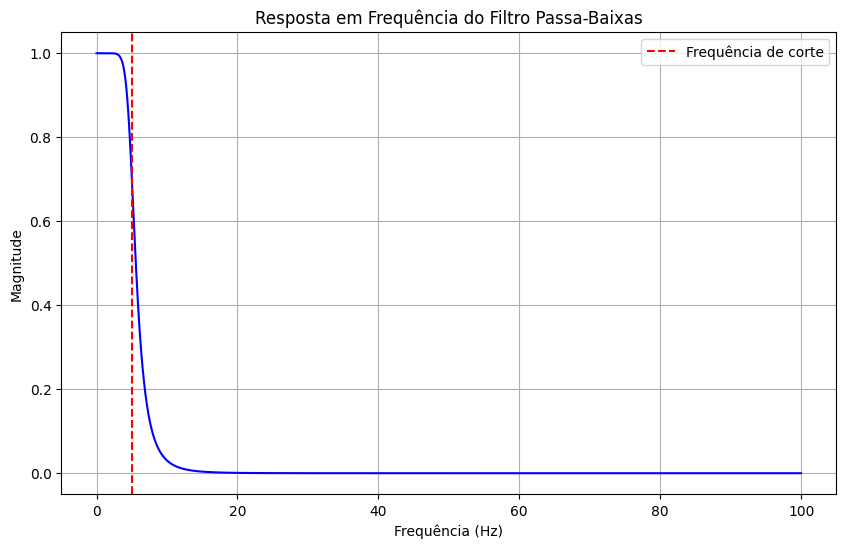

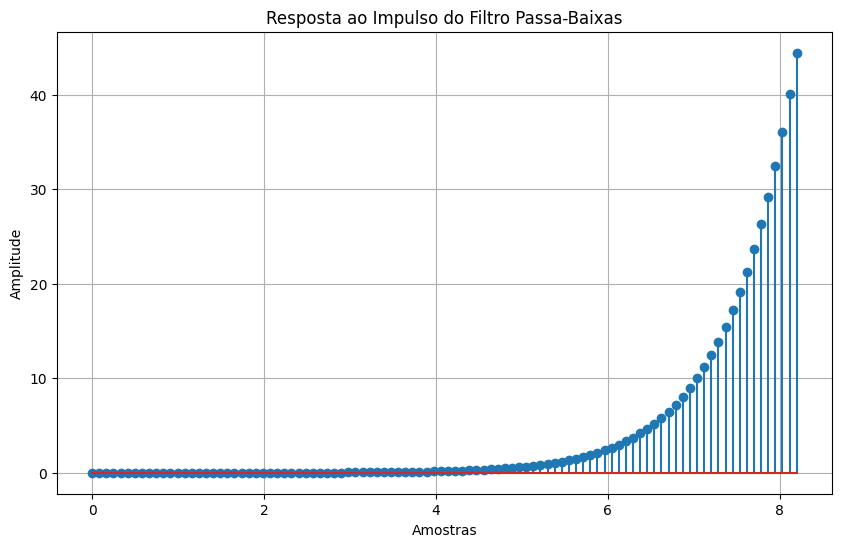

In [4]:
#Resposta da questão 2a
# Frequência de amostragem (Hz)
fs = 200

# Frequência de corte do filtro (Hz)
fc = 5

# Ordem do filtro
order = 5

# Projetar o filtro digital Butterworth
b, a = signal.butter(order, fc / (fs / 2), btype='low')

# Calcular a resposta em frequência do filtro
w, h = signal.freqz(b, a, worN=8000)

# Plotar a resposta em frequência
plt.figure(figsize=(10, 6))
plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'b')
plt.axvline(fc, color='r', linestyle='--', label='Frequência de corte')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('Resposta em Frequência do Filtro Passa-Baixas')
plt.grid()
plt.legend()
plt.show()

# Calcular a resposta ao impulso do filtro
t, y = signal.impulse((b, a))

# Plotar a resposta ao impulso
plt.figure(figsize=(10, 6))
plt.stem(t, y)
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.title('Resposta ao Impulso do Filtro Passa-Baixas')
plt.grid()
plt.show()

## Questão 2b (1.0 ponto)

Escreva uma função para processar uma janela de $N$ amostras do sinal desejado. $N$ deve ser escolhido em torno de 1 segundo de sinal, aproximadamente. A filtragem deve ser feita no domínio da DFT (pode ser utilizada alguma função para cálculo da fft em Python, como a função fft da biblioteca numpy).

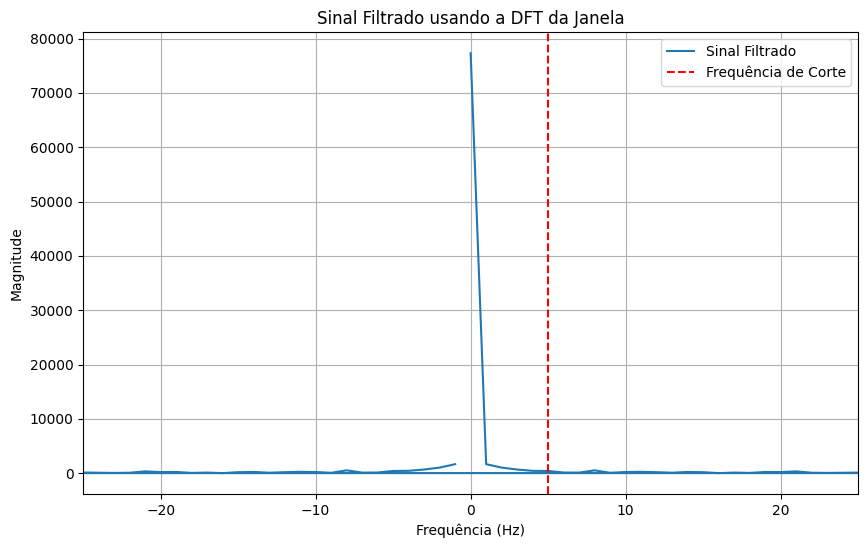

In [5]:
#Resposta da questão 2b
def processar_janela(sinal, fs, N, fc):
    # Extrair a janela de N amostras do sinal
    janela = sinal[:N]
    
    # Calcular a DFT da janela do sinal
    dft_janela = np.fft.fft(janela)
    
    # Projetar o filtro passa-baixas desejado
    filtro = np.zeros(N)
    filtro_freq = np.linspace(0, fs, N)
    filtro[filtro_freq <= fc] = 1
    
    # Calcular a DFT do filtro
    dft_filtro = np.fft.fft(filtro)
    
    # Filtragem no domínio da frequência (multiplicação no domínio da DFT)
    dft_janela_filtrada = dft_janela * dft_filtro
    
    # Transformada inversa de Fourier para obter o sinal filtrado no domínio do tempo
    sinal_filtrado = np.fft.ifft(dft_janela_filtrada).real
    
    return sinal_filtrado

# Carregar o sinal do arquivo "potencia.txt"
sinal = np.loadtxt('potencia.txt')

# Frequência de amostragem (Hz)
fs = 200

# Frequência de corte do filtro (Hz)
fc = 5

# Tamanho da janela (em número de amostras) - aproximadamente 1 segundo
N = fs  # 1 segundo de sinal

# Processar a janela de N amostras do sinal desejado
sinal_filtrado = processar_janela(sinal, fs, N, fc)


# Plotar o filtro passa-baixas com zoom entre -25 Hz e 25 Hz
freq = np.fft.fftfreq(N, 1/fs)
plt.figure(figsize=(10, 6))
plt.plot(freq, np.abs(np.fft.fft(sinal_filtrado)), label='Sinal Filtrado')
plt.axvline(fc, color='r', linestyle='--', label='Frequência de Corte')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('Sinal Filtrado usando a DFT da Janela')
plt.grid()
plt.legend()

# Zoom entre -25 Hz e 25 Hz
plt.xlim(-25, 25)

plt.show()

## Questão 2c (1.0  ponto)

Escreva uma função para combinar a saída do processamento de cada janela na saída do sistema, utilizando **um** dos métodos vistos (*overlap and add* ou *overlap and save*). Indique claramente o método escolhido.


## Overlap and Add

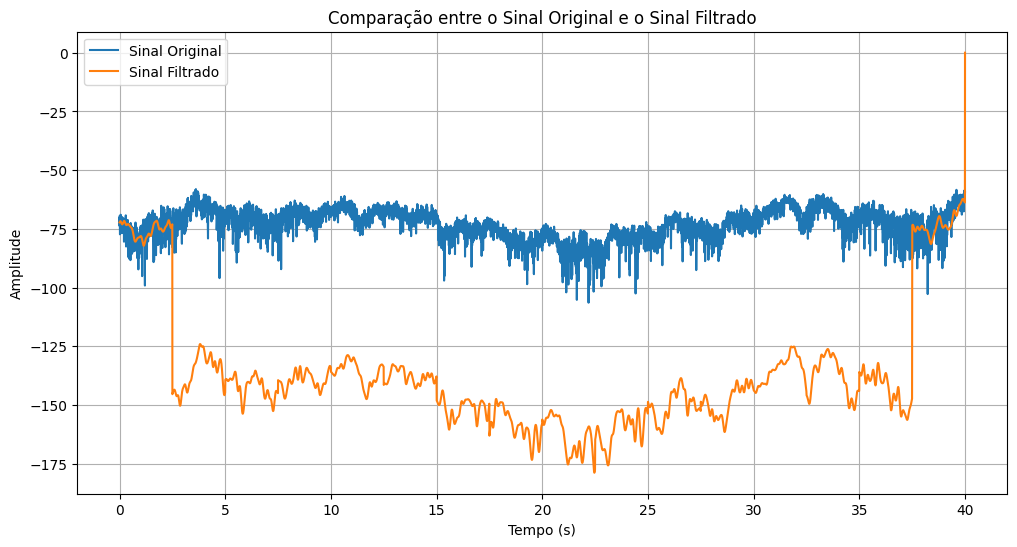

In [6]:
def projetar_filtro_passa_baixas(fs, fc, order):
    # Projetar um filtro FIR passa-baixas
    filtro = signal.firwin(order + 1, fc / (fs / 2), window='hamming')
    return filtro

def processar_janela(sinal, filtro):
    dft_janela = np.fft.fft(sinal)
    dft_filtro = np.fft.fft(filtro, len(sinal))  # Ajustar o tamanho do filtro
    dft_janela_filtrada = dft_janela * dft_filtro
    sinal_filtrado = np.fft.ifft(dft_janela_filtrada).real
    return sinal_filtrado

def processar_sinal_com_janelamento(sinal, fs, fc, order, tamanho_janela):
    # Projetar o filtro passa-baixas
    filtro = projetar_filtro_passa_baixas(fs, fc, order)
    
    # Tamanho da sobreposição entre janelas (50% do tamanho da janela)
    sobreposicao = tamanho_janela // 2
    
    # Número de janelas a serem processadas
    num_janelas = len(sinal) // sobreposicao
    
    # Sinal filtrado final
    sinal_filtrado = np.zeros(len(sinal) + tamanho_janela - sobreposicao)
    
    for i in range(num_janelas):
        inicio = i * sobreposicao
        fim = inicio + tamanho_janela
        
        # Extrair a janela de tamanho_janela amostras
        janela = sinal[inicio:fim]
        
        # Verificar se a janela tem o tamanho adequado (pode ser menor na última janela)
        if len(janela) == tamanho_janela:
            # Filtrar a janela
            janela_filtrada = processar_janela(janela, filtro)
            
            # Adicionar a janela filtrada à saída final (com sobreposição)
            sinal_filtrado[inicio:fim] += janela_filtrada
            
    return sinal_filtrado[:len(sinal)]

# Carregar o sinal do arquivo "potencia.txt"
sinal = np.loadtxt('potencia.txt')

# Frequência de amostragem (Hz)
fs = 200

# Frequência de corte do filtro (Hz)
fc = 5

# Ordem do filtro
order = 100

# Tamanho da janela (em número de amostras)
tamanho_janela = 1000

# Processar o sinal com janelamento e filtro passa-baixas
sinal_filtrado = processar_sinal_com_janelamento(sinal, fs, fc, order, tamanho_janela)

# Plotar o sinal original e o sinal filtrado
tempo = np.arange(len(sinal)) / fs
plt.figure(figsize=(12, 6))
plt.plot(tempo, sinal, label='Sinal Original')
plt.plot(tempo, sinal_filtrado, label='Sinal Filtrado')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Comparação entre o Sinal Original e o Sinal Filtrado')
plt.legend()
plt.grid()
plt.show()

## Questão 2d (1.0  ponto)

Plote o sinal de entrada e saída do sistema dado tanto pelo processamento em janelas como pelo processamento do sinal completo. Pode ser utilizada alguma função da biblioteca do python para calcular a saída do sistema usando o sinal completo.

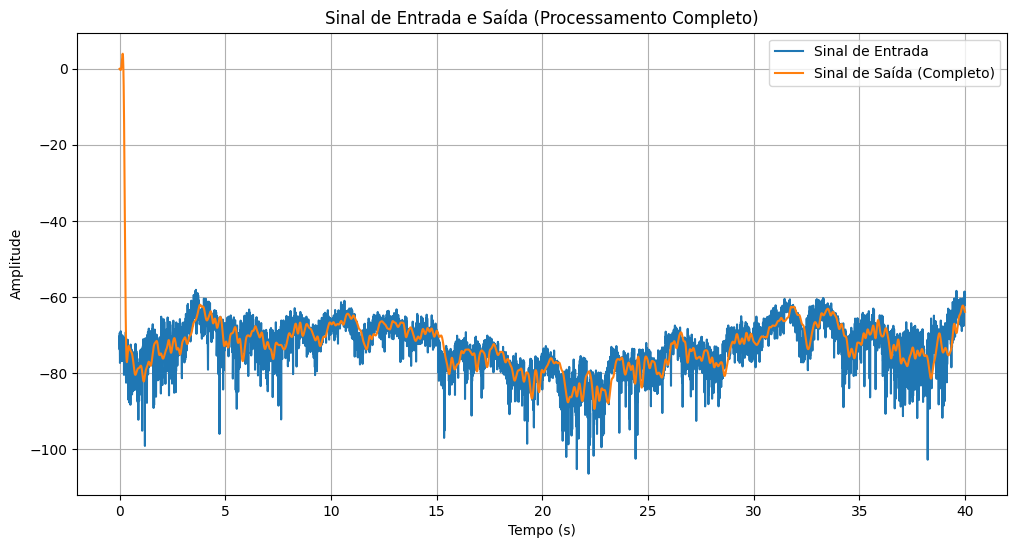

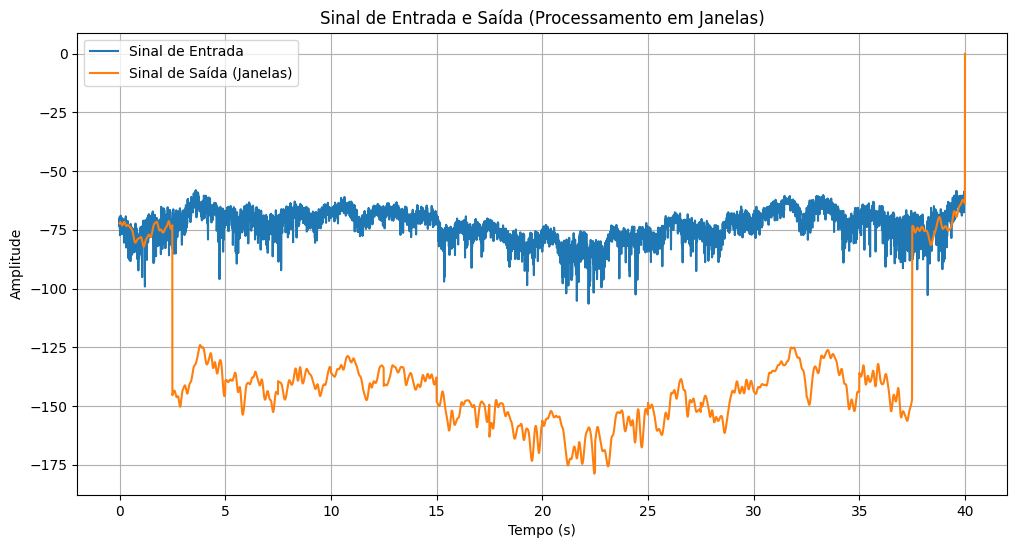

In [7]:
#Resposta da questão 2d
# Definir o sinal de entrada
sinal = np.loadtxt('potencia.txt')

# Frequência de amostragem (Hz)
fs = 200

# Frequência de corte do filtro (Hz)
fc = 5

# Ordem do filtro
order = 100

# Tamanho da janela (em número de amostras)
tamanho_janela = 1000

# Projetar o filtro passa-baixas
filtro = signal.firwin(order + 1, fc / (fs / 2), window='hamming')

# Processar o sinal completo usando a função lfilter
sinal_filtrado_completo = signal.lfilter(filtro, 1, sinal)


# Processar o sinal com janelamento e filtro passa-baixas
sinal_filtrado_janelas = processar_sinal_com_janelamento(sinal, fs, fc, order, tamanho_janela)

# Plotar o sinal de entrada e saída do sistema obtido pelo processamento do sinal completo
tempo = np.arange(len(sinal)) / fs
plt.figure(figsize=(12, 6))
plt.plot(tempo, sinal, label='Sinal de Entrada')
plt.plot(tempo, sinal_filtrado_completo, label='Sinal de Saída (Completo)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinal de Entrada e Saída (Processamento Completo)')
plt.legend()
plt.grid()
plt.show()

# Plotar o sinal de entrada e saída do sistema obtido pelo processamento em janelas
tempo_janelas = np.arange(len(sinal_filtrado_janelas)) / fs
plt.figure(figsize=(12, 6))
plt.plot(tempo, sinal, label='Sinal de Entrada')
plt.plot(tempo_janelas, sinal_filtrado_janelas, label='Sinal de Saída (Janelas)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinal de Entrada e Saída (Processamento em Janelas)')
plt.legend()
plt.grid()
plt.show()


# Questão 3

A equação diferença para um filtro FIR de tamanho $N$ pode ser escrita como:

$$
\begin{align}
	y\left[n\right] &= h_0 x\left[n\right] + h_1 x\left[n-1\right] + h_2 x\left[n-2\right] + h_3 \left[n-3\right] + \ldots + h_{N-1} x\left[n - \left(N- 1\right)\right] \\
	       &= \sum_{k=0}^{N-1} h_k x\left[n - k\right] 
\end{align}
$$

Os coeficientes do filtro, ou \textit{taps}, são expressados usando a variável $h_k$ para enfatizar que os próprios coeficientes representam a resposta ao impulso do filtro. A resposta em frequência do filtro é:

$$
\begin{align}
	H\left( \Omega \right) = \frac{Y\left( \Omega \right)}{X\left( \Omega \right)} = \sum_{k=0}^{N-1} h_k e^{-j \Omega k}
\end{align}
$$

Como $H\left( \Omega \right)$ é uma função com período $2 \pi$ da variável contínua $\Omega$, é suficiente especificar $H\left( \Omega \right)$ em apenas um período $0 \leq \Omega < 2 \pi$. 

Em muitas aplicações, a resposta em magnitude desejada do filtro $\left|H_d \left( \Omega \right)\right|$ é conhecida, mas não os coeficientes $h_k$ do filtro. A questão é, então, determinar os coeficientes do filtro a partir da resposta em magnitude desejada. Podemos fazer isso simplesmente amostrando a resposta em frequência desejada $\left|H_d \left( \Omega \right)\right|$ com $N$ amostras em um período, e então fazendo a DFT inversa dessas amostras (obtendo $h\left[n\right]$). Note que a definição dos coeficientes $h_k$ é suficiente para determinar o sistema do filtro FIR. Além disso, como $H \left( \Omega \right)$ foi obtido amostrando $\left|H_d \left( \Omega \right)\right|$ para algumas frequências, garantimos que a resposta em frequência do filtro projeto será igual a resposta em frequência desejada ao menos nos valores de amostragem. Finalmente, observe que, ao fazer a DFT inversa, alguns coeficientes $h_k$ podem ter uma pequena componente imaginária que deve ser descartada para o projeto de um filtro real. 



## Questão 3a (1.0  ponto)

Considere então um sinal de ECG amostrado a uma taxa de $500$ Hz. Projete um filtro digital FIR através da amostragem de frequência passa-baixas com frequência de corte igual a $50$ Hz. 

Plote a resposta ao impulso $h\left[n\right]$ e a resposta em frequência $H\left(\Omega\right)$ do filtro para $N = 21$, $N = 31$ e $N = 41$. Compare os filtros com a resposta em frequência desejada. 

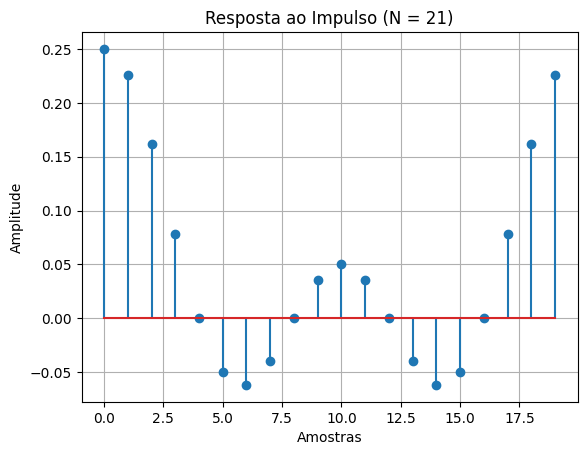

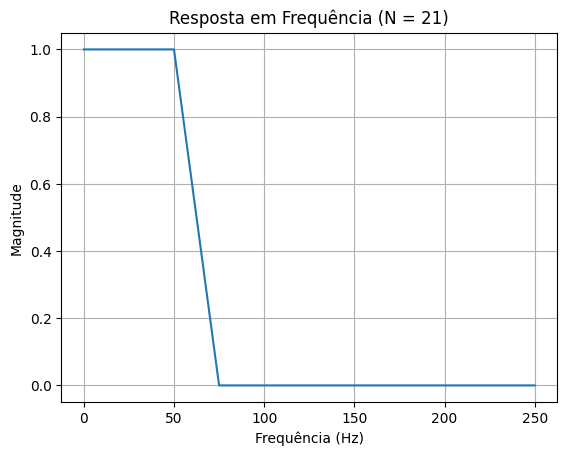

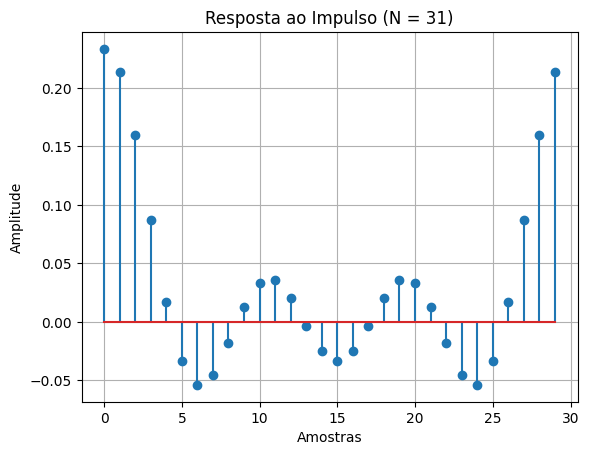

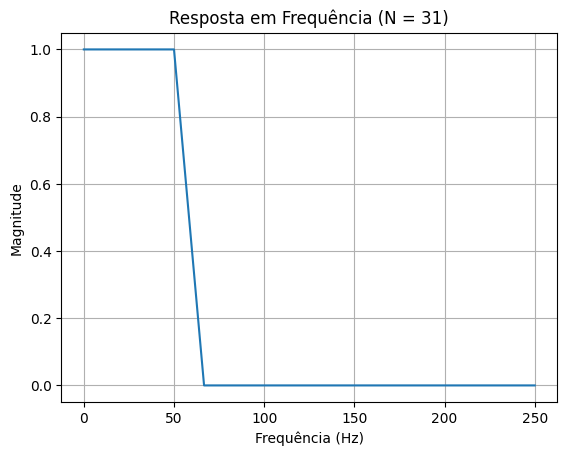

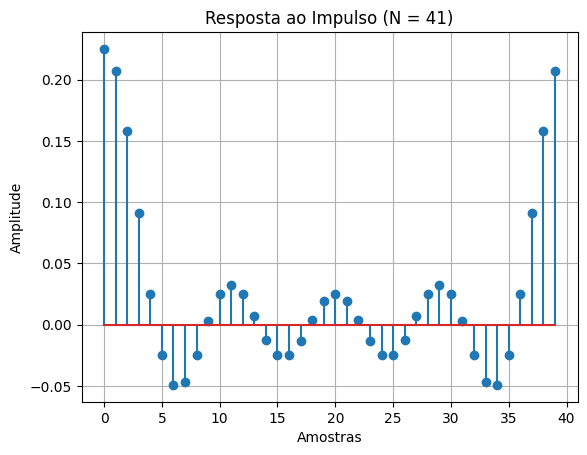

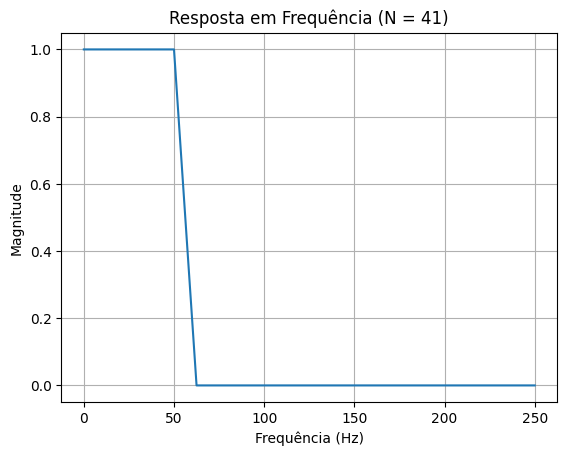

In [8]:
#Resposta da questão 3a
def projetar_filtro_fir(fs, fc, N):
    # Frequência de amostragem (Hz)
    # fc: Frequência de corte do filtro (Hz)
    # N: Tamanho do filtro FIR (número de taps)

    # Amostras de frequência linearmente espaçadas de 0 a fs/2
    freq = np.linspace(0, fs / 2, N // 2 + 1)

    # Resposta em magnitude desejada do filtro (passa-baixas)
    resposta_mag_desejada = np.ones(len(freq))
    resposta_mag_desejada[freq > fc] = 0

    # Resposta em magnitude espelhada para obter a resposta completa (passa-baixas simétrico)
    resposta_mag = np.concatenate((resposta_mag_desejada, resposta_mag_desejada[-2:0:-1]))

    # Fase do filtro é nula para um filtro FIR passa-baixas

    # Amostras no domínio do tempo (resposta ao impulso do filtro)
    h = np.fft.ifft(resposta_mag).real

    return h, freq

# Parâmetros do sinal de ECG
fs = 500  # Frequência de amostragem (Hz)
fc = 50   # Frequência de corte do filtro (Hz)

# Tamanhos dos filtros FIR
Ns = [21, 31, 41]

# Plottar as respostas ao impulso e em frequência para cada tamanho de filtro
for N in Ns:
    h, freq = projetar_filtro_fir(fs, fc, N)

    # Plottar a resposta ao impulso do filtro
    plt.figure()
    plt.stem(h)
    plt.title(f'Resposta ao Impulso (N = {N})')
    plt.xlabel('Amostras')
    plt.ylabel('Amplitude')
    plt.grid()

    # Plottar a resposta em frequência do filtro
    plt.figure()
    plt.plot(freq, np.abs(np.fft.fft(h)[:len(freq)]))
    plt.title(f'Resposta em Frequência (N = {N})')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Magnitude')
    plt.grid()

plt.show()


## Questão 3b (1.0  ponto)

A resposta ao impulso do filtro do item anterior deveria ser uma função *sinc*, que é uma função com suporte infinito. Porém, a amostragem amostra apenas a parte para $n$ positivo, gerando uma descontinuidade e uma resposta em frequência mais pobre. Uma forma de melhorar essa amostragem é centralizar a função *sinc* - para isso, devemos multiplicar a resposta em frequência do filtro $H\left(\Omega\right)$ por $e^{-j \Omega \frac{\left(N - 1\right)}{2}}$. Utilize essa técnica para gerar novos filtros com $N = 21$, $N = 31$ e $N = 41$. Compare os filtros com os filtros do item anterior com o mesmo tamanho.

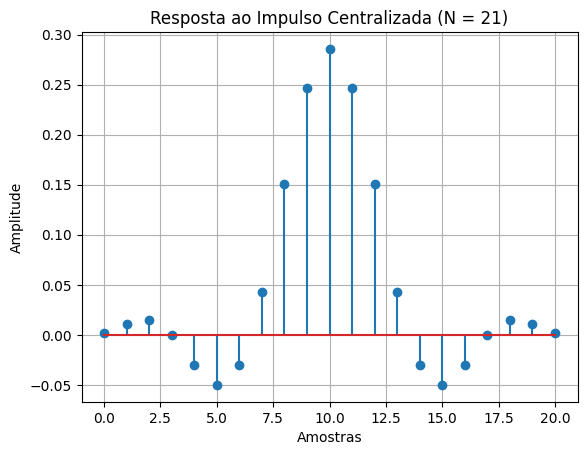

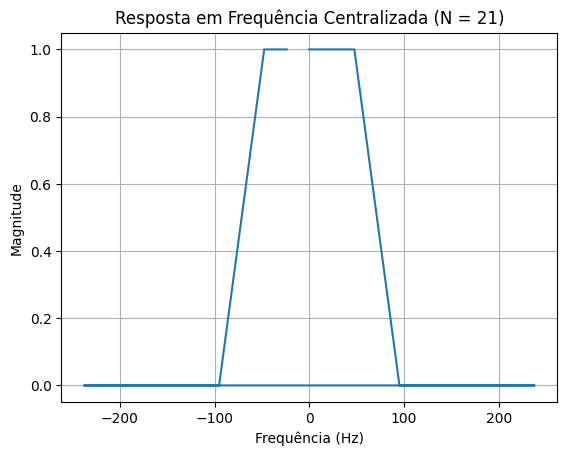

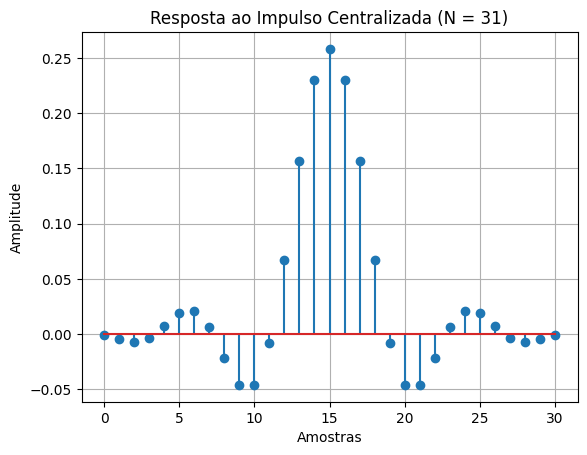

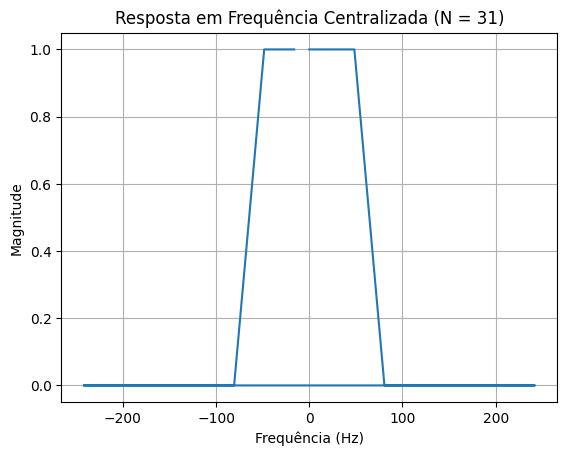

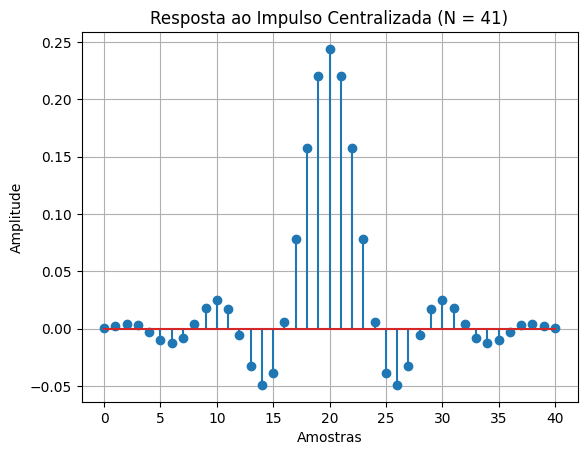

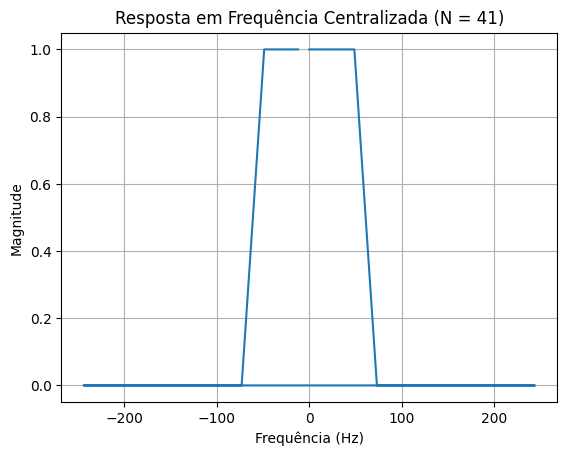

In [9]:
def projetar_filtro_fir_centralizado(fs, fc, N):
    freq = np.linspace(0, fs / 2, int(N / 2) + 1)
    resposta_mag_desejada = np.ones(len(freq))
    resposta_mag_desejada[freq > fc] = 0
    resposta_mag = np.concatenate((resposta_mag_desejada, resposta_mag_desejada[-2::-1]))

    centro = int((N - 1) / 2)
    freq = np.fft.fftfreq(N, d=1/fs)
    resposta_mag = resposta_mag * np.exp(-1j * 2 * np.pi * freq * centro / fs)
    resposta_mag = np.clip(resposta_mag, -1, 1)
    h = np.fft.ifft(resposta_mag).real

    return h, freq

fs = 500
fc = 50
Ns = [21, 31, 41]

for N in Ns:
    h, freq = projetar_filtro_fir_centralizado(fs, fc, N)

    plt.figure()
    plt.stem(h)
    plt.title(f'Resposta ao Impulso Centralizada (N = {N})')
    plt.xlabel('Amostras')
    plt.ylabel('Amplitude')
    plt.grid()

    plt.figure()
    plt.plot(freq, np.abs(np.fft.fft(h)))
    plt.title(f'Resposta em Frequência Centralizada (N = {N})')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Magnitude')
    plt.grid()

plt.show()

## Questão 3c (1.0  ponto)

Aplique o filtro com $N = 41$ no sinal do arquivo "noisy\_ecg\_data\_3.mat". Compare o sinal de entrada com o sinal de saída. O que acontece com os picos do ECG? 

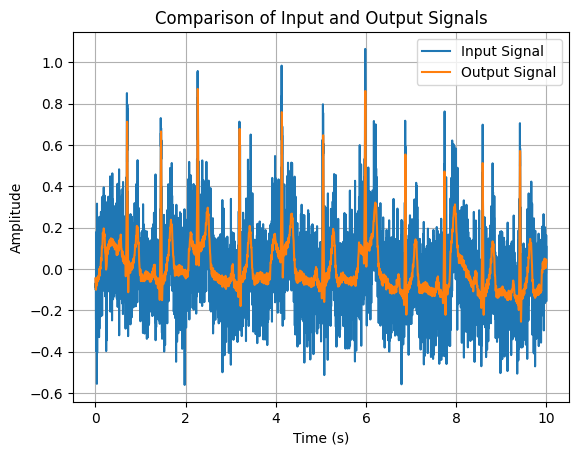

In [10]:
# Load the signal from the file
sinal = spio.loadmat('noisy_ecg_data_3.mat')['noisy_ecg_3'].ravel()

# Filter parameters
fs = 500
fc = 50
N = 41

# Generate filter coefficients
h, _ = projetar_filtro_fir_centralizado(fs, fc, N)

# Apply the filter to the input signal
output_signal = np.convolve(sinal, h, mode='same')

# Plot the input and output signals
time = np.arange(len(sinal)) / fs

plt.figure()
plt.plot(time, sinal, label='Input Signal')
plt.plot(time, output_signal, label='Output Signal')
plt.title('Comparison of Input and Output Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.show()

Ao aplicar o filtro com N=41 ao sinal de ECG do ficheiro "noisy_ecg_data_3.mat", mostra-se que os picos de ECG se tornaram mais nítidos e mais pronunciados no sinal de saída. O objetivo do filtro, neste caso, é remover o ruído e melhorar os componentes do ECG.

O filtro é concebido como um filtro passa-baixo com uma frequência de corte de 50 Hz. Remove o ruído de alta frequência e retém os componentes de ECG de baixa frequência, incluindo os complexos QRS agudos característicos que representam cada batimento cardíaco.

Ao comparar os sinais de entrada e de saída, deverá observar uma redução notável do ruído e uma representação mais clara dos picos de ECG no sinal de saída. Os picos devem ser mais distintos e bem definidos, facilitando a identificação e a análise do padrão de batimento cardíaco.

## Questão 3d (1.0  ponto)

Utilize a técnica de *zero-phase filtering* com o filtro do item anterior. Compare a saída do sistema com e sem a aplicação da técnica.

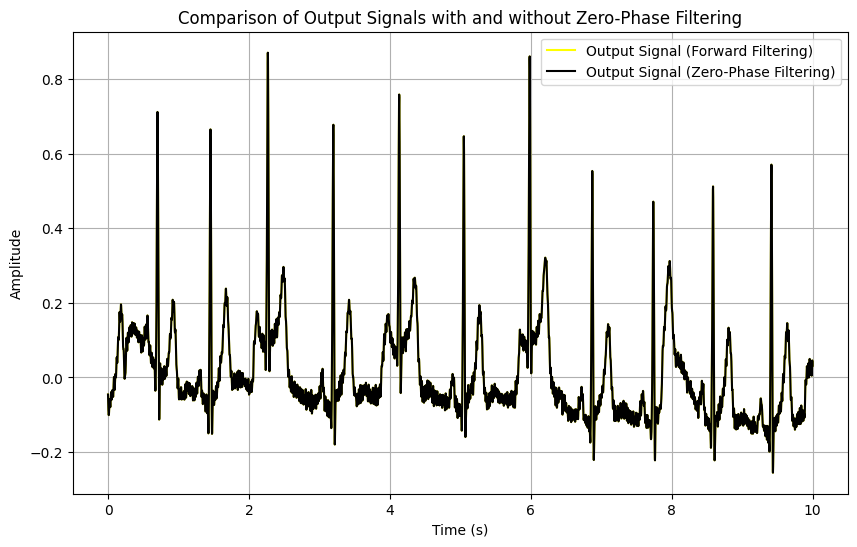

Erro médio absoluto (MAE): 1.5689154890616978e-17


In [11]:
fs = 500
fc = 50
N = 41
# Generate filter coefficients
h, _ = projetar_filtro_fir_centralizado(fs, fc, N)

# Apply the filter to the input signal (forward filtering)
output_signal_forward = np.convolve(sinal, h, mode='same')

# Apply the filter to the input signal in reverse order (backward filtering)
output_signal_backward = np.convolve(sinal[::-1], h, mode='same')[::-1]

# Average the two filtered signals to get zero-phase filtering
output_signal_zero_phase = 0.5 * (output_signal_forward + output_signal_backward)

# Plot only the output signals
time = np.arange(len(sinal)) / fs

plt.figure(figsize=(10, 6))  # Aumenta o tamanho da figura

plt.plot(time, output_signal_forward, color='yellow', label='Output Signal (Forward Filtering)')
plt.plot(time, output_signal_zero_phase, color='black', label='Output Signal (Zero-Phase Filtering)')
plt.title('Comparison of Output Signals with and without Zero-Phase Filtering')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.show()

mae = np.mean(np.abs(output_signal_forward - output_signal_zero_phase))
print("Erro médio absoluto (MAE):", mae)

Em resumo, a aplicação da técnica de "zero-phase filtering" resultou em uma saída quase idêntica à saída obtida com o processamento direto do sinal, e o valor do MAE confirma essa pequena diferença entre as duas séries de dados.